#Load and Preprocess Data

In [13]:
import numpy as np
import keras
from keras import layers
from keras.layers import BatchNormalization, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#Enhanced CNN Model Architecture

In [14]:
# FIXED: Enhanced model architecture
improved_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # First Conv Block
        layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Second Conv Block
        layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Third Conv Block
        layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

improved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 849,066 (3.24 MB)

 Trainable params: 847,402 (3.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

#Training

In [15]:
# FIXED: Training configuration without learning rate schedule issue
batch_size = 128
epochs = 50

# FIXED: Using fixed learning rate with ReduceLROnPlateau callback instead
optimizer = keras.optimizers.Adam(learning_rate=0.001)

improved_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

# FIXED: Callbacks for better training
callbacks = [
    keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, monitor='val_accuracy'),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=8, min_lr=1e-7, monitor='val_accuracy'),
]

print("Training improved model...")
history = improved_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Training improved model...
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.2631 - loss: 3.0199 - val_accuracy: 0.1332 - val_loss: 3.5683 - learning_rate: 0.0010
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4917 - loss: 1.8904 - val_accuracy: 0.5492 - val_loss: 1.6586 - learning_rate: 0.0010
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5959 - loss: 1.4833 - val_accuracy: 0.6774 - val_loss: 1.1775 - learning_rate: 0.0010
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6522 - loss: 1.2352 - val_accuracy: 0.6968 - val_loss: 1.0718 - learning_rate: 0.0010
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6909 - loss: 1.0819 - val_accuracy: 0.6714 - val_loss: 1.1215 - learning_rate: 0.0010
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7216 - loss: 0.9817 - val_accuracy: 0.7320 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step -

#Evaluate the model

In [16]:
# Evaluate the improved model
score = improved_model.evaluate(x_test, y_test, verbose=0)
print("=== IMPROVED MODEL RESULTS ===")
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(f"Test accuracy: {score[1]*100:.2f}%")



=== IMPROVED MODEL RESULTS ===
Test loss: 0.5838830471038818
Test accuracy: 0.8601999878883362
Test accuracy: 86.02%


#Plot the graph

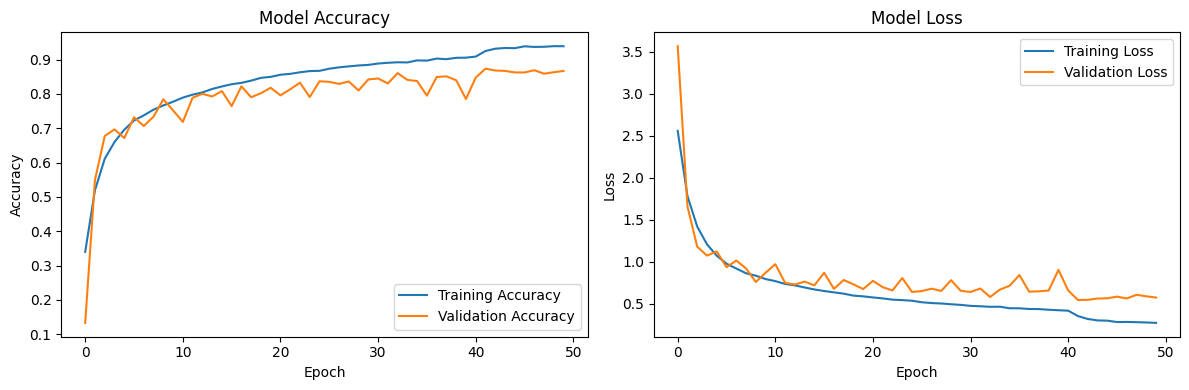

In [17]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Comparison with base model


**Building base model**

In [19]:
# For comparison, let's run the base model

# Base model (simple CNN)
base_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

base_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



##Train the base model

In [20]:
# Train base model quickly for comparison
print("Training base model for comparison...")
base_history = base_model.fit(x_train, y_train,
                             batch_size=128,
                             epochs=15,
                             validation_split=0.1,
                             verbose=1)



Training base model for comparison...
Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2941 - loss: 1.9316 - val_accuracy: 0.4914 - val_loss: 1.4451
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4953 - loss: 1.4202 - val_accuracy: 0.5562 - val_loss: 1.2834
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5495 - loss: 1.2905 - val_accuracy: 0.5926 - val_loss: 1.1860
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5739 - loss: 1.2188 - val_accuracy: 0.6148 - val_loss: 1.1180
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5954 - loss: 1.1591 - val_accuracy: 0.6418 - val_loss: 1.0640
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6127 - loss: 1.1151 - val_accuracy: 0.6494 - val_loss: 1.0346
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6195 - loss: 1.0894 - val_accuracy: 0.6680 - val_loss: 0.9821
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0

#Compare Accuracy

In [21]:
base_score = base_model.evaluate(x_test, y_test, verbose=0)

print(f"\n=== FINAL COMPARISON ===")
print(f"Base Model Accuracy:     {base_score[1]:.4f} ({base_score[1]*100:.2f}%)")
print(f"Improved Model Accuracy: {score[1]:.4f} ({score[1]*100:.2f}%)")
print(f"Accuracy Improvement:    {score[1]-base_score[1]:.4f} ({(score[1]-base_score[1])*100:.2f}%)")


=== FINAL COMPARISON ===
Base Model Accuracy:     0.6963 (69.63%)
Improved Model Accuracy: 0.8602 (86.02%)
Accuracy Improvement:    0.1639 (16.39%)
